In [1]:
import numpy as np
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.optimizers import TFOptimizer
from tensorflow.python.keras.models import load_model
data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 50 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/10
170/170 [==============================] - 291s 2s/step - loss: 0.6309 - accuracy: 0.6447 - val_loss: 0.8712 - val_accuracy: 0.5096
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/10
170/170 [==============================] - 278s 2s/step - loss: 0.5645 - accuracy: 0.7072 - val_loss: 0.5039 - val_accuracy: 0.7412
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/10
170/170 [==============================] - 304s 2s/step - loss: 0.4703 - accuracy: 0.7712 - val_loss: 0.4377 - val_accuracy: 0.7978
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/10
170/170 [==============================] - 307s 2s/step - loss: 0.3556 - accuracy: 0.8407 - val_loss: 0.3090 - val_accuracy: 0.8610
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/10
170/170 [==============================] - 303s 2s/step - loss: 0.2738 - accuracy: 0.8830 - val_loss: 0.3132 - val_accuracy: 0.8669
Epoch 6/10
170/170 [==============================] -

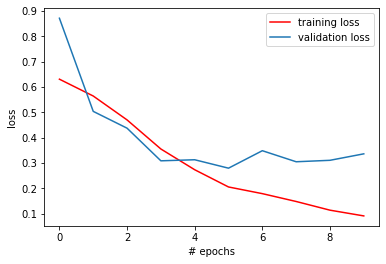

In [5]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

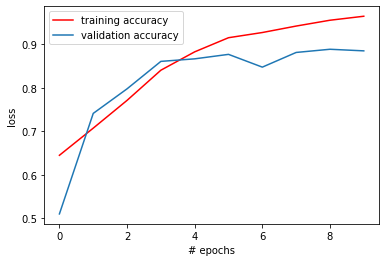

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()